# Topics

## 1. Sound in Python 
## 2. Sound Compression and Discrete Fourier Transform (DFT)



## Check if there were unfinished breakout exercises from last week!!!

In [134]:
import os
os.system("afplay tuimelaar.wav") 

0

In [2]:
'''Play the A tone at 440 Hz '''
import numpy as np
import os
from scipy.io.wavfile import write

freq = 440.
sample_rate = 44100.
duration = 3
time_pts = np.linspace(0, duration, duration*sample_rate)
amp = 2**7
Atone_data = amp*np.sin(np.pi*2*freq*time_pts)
Atone_data = np.uint8(Atone_data)

write('Atone.wav', sample_rate, Atone_data)
os.system("afplay Atone.wav") 



0

In [3]:
'''Play a tone at 880 Hz '''
import numpy as np
import os
from scipy.io.wavfile import write

freq = 440.*2
sample_rate = 44100.
duration = 3
time_pts = np.linspace(0, duration, duration*sample_rate)
amp = 2**7
tone_data = amp*np.sin(np.pi*2*freq*time_pts)
tone_data = np.uint8(tone_data)

write('tone.wav', sample_rate, tone_data)
os.system("afplay tone.wav") 


0

In [25]:
'''Play the A tone at twice the sampling rate '''
import numpy as np
import os
from scipy.io.wavfile import write

freq = 440.
sample_rate = 44100.
duration = 3
time_pts = np.linspace(0, duration, duration*sample_rate)
amp = 2**7
tone_data = amp*np.sin(np.pi*2*freq*time_pts)
tone_data = np.uint8(tone_data)

write('tone2.wav', sample_rate*2, tone_data)
os.system("afplay Atone.wav") 
os.system("afplay tone2.wav") 
# Do scientific python note A and sample rate

0

In [26]:
'''Play the A tone at 440 Hz and another at 880 Hz '''
import numpy as np
import os
from scipy.io.wavfile import write

freq = 440.
sample_rate = 44100.
duration = 2
time_pts = np.linspace(0, duration, duration*sample_rate)

Atone_data = np.sin(np.pi*2*freq*time_pts)
Atone_dbl = np.sin(np.pi*2*freq*2*time_pts)
#Atone_tpl = amp*np.sin(np.pi*3*freq*2*time_pts)


amp1 = 2**6
amp2 = 2**5

sound_data = amp1*Atone_data + amp2*Atone_dbl 


# Atone_tpl = amp*np.sin(np.pi*3*freq*2*time_pts)
# amp3 = 2**3
# sound_data = amp1*Atone_data + amp2*Atone_dbl + amp3*Atone_tpl 
# sound_data = sound_data.astype(np.uint8)

write('sound.wav', sample_rate, sound_data)
#os.system("afplay Atone.wav") 
os.system("afplay sound.wav") 
# Do scientific python note A and sample rate

0

rate 48000
uint8 (142208,)


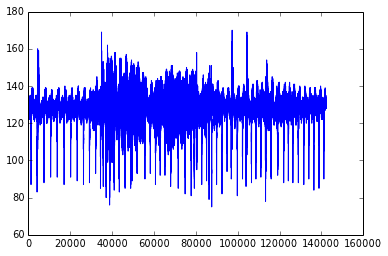

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
rate, dolph_snd = read("tuimelaar.wav")
#numpy.array(a[1],dtype=float)
#dolphin_snd = np.array(a[1], dtype = float)
print 'rate', rate
print dolph_snd.dtype, dolph_snd.shape
plt.plot(dolph_snd)
plt.show()

44100


0

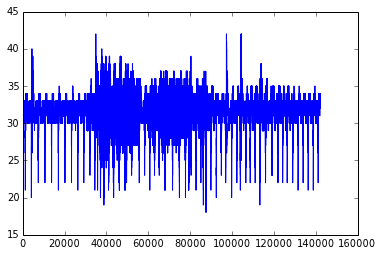

In [21]:
import numpy as np
from scipy.io.wavfile import write
quiet_dolph = dolph_snd/4
print rate
plt.plot(quiet_dolph)
write('quiet_dolph.wav', rate, quiet_dolph)
os.system("afplay tuimelaar.wav") 
os.system("afplay quiet_dolph.wav") 

In [22]:
import numpy as np
from scipy.io.wavfile import write
lo_rate = rate/8
write('lo_pitch_dolph.wav', lo_rate, dolph_snd)
os.system("afplay tuimelaar.wav") 
os.system("afplay lo_pitch_dolph.wav") 

0

## Breakout:
## Write a function that takes a numpy array, and a play rate, creates a temp wav file, plays the sound, then removes (rm) the temp file.  Call it playsound().

In [19]:
import numpy as np
import os
from scipy.io.wavfile import write


def playsound(nparray, sample_rate):
    write('temp.wav', sample_rate, nparray)
    os.system("afplay temp.wav")
    os.system("rm temp.wav")



playsound(dolph_snd, rate*7)


In [20]:
lo_rate = rate/4
playsound(lo_rate, dolph_snd)

AttributeError: 'int' object has no attribute 'dtype'

rate 44100
data type int16
(10133592, 2)
(396900, 2)
(396900,)


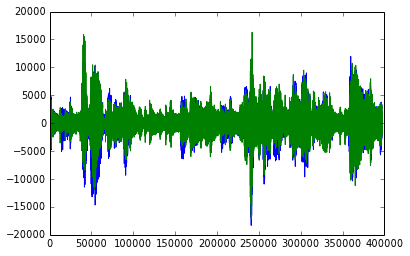

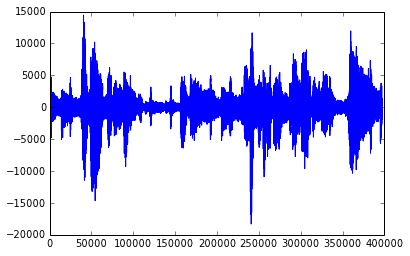

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
import os
rate, barry_white = read("BarryWhite.wav")
#numpy.array(a[1],dtype=float)
#dolphin_snd = np.array(a[1], dtype = float)
print 'rate', rate
print 'data type', barry_white.dtype

# It has two columns: stereosound!
print barry_white.shape
start_time = 1
end_time = 10
duration = end_time - start_time
shortBW = barry_white[start_time*rate: end_time*rate, :]
print shortBW.shape
plt.plot(shortBW)

# shortBW = shortBW/2
# print 'data type', shortBW.dtype


# just one channel
shortBW = shortBW[:, 0]
print shortBW.shape
# shortBW = shortBW/2
# print 'data type', shortBW.dtype


playsound(shortBW, rate)

# write('shortBW.wav', rate, shortBW)
# os.system('afplay shortBW.wav')
plt.figure()
plt.plot(shortBW)
plt.show()




data type float64


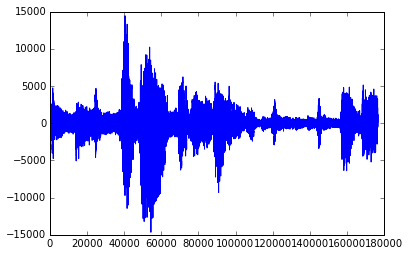

In [150]:
BW_back = np.fft.ifft(sp).real
print 'data type', BW_back.dtype
BW_back = np.int16(BW_back)
playsound(rate, BW_back)

plt.plot(BW_back)
plt.show()
# write('BW_back.wav', rate, BW_back)
# os.system('afplay BW_back.wav')



## End of week 9